In [1]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Chargement du Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

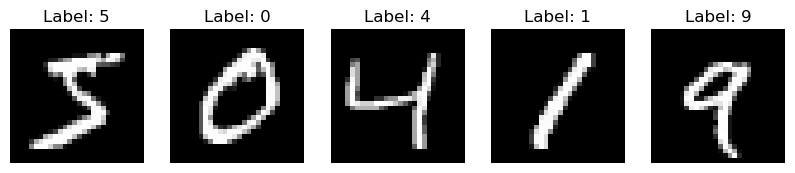

In [5]:
# Affichage de quelques exemples d'images pour une compréhension visuelle
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y.iloc[i]}')
    ax.axis('off')
plt.show()

In [7]:
# 2. Pré-traitement des Données
# Convertir les étiquettes de chaînes de caractères à entiers
y = y.astype('int')

In [9]:
# Normalisation des pixels pour faciliter l'apprentissage
X = X / 255.0

In [11]:
# 3. Division en Ensembles d'Entraînement et de Test
# Utilisation de 80 % des données pour l'entraînement et 20 % pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 4. Entraînement du Modèle KNN
# Initialisation de KNN avec k=3 voisins
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# 5. Évaluation du Modèle
# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

In [16]:
# Calcul et affichage de l'accuracy et du rapport de classification
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9712857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



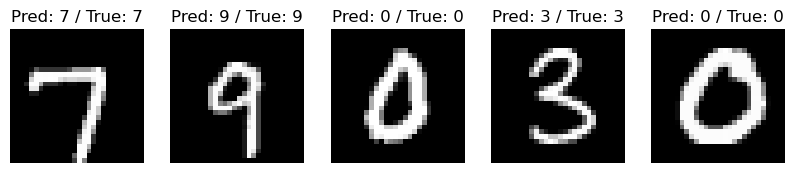

In [19]:
# 6. Visualisation de quelques Prédictions
# Affichage de quelques images test avec leurs prédictions pour une interprétation visuelle
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    img_index = np.random.randint(0, len(X_test))
    ax.imshow(X_test.iloc[img_index].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {y_pred[img_index]} / True: {y_test.iloc[img_index]}')
    ax.axis('off')
plt.show()